# Credit Card Fraud Detection

### Author: Erick Orozco

In [1]:
# libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data 

Source: https://www.kaggle.com/datasets/kartik2112/fraud-detection/data

In [2]:
# load data 
train_df = pd.read_csv('data/fraudTrain.csv')
test_df = pd.read_csv('data/fraudTest.csv')

#keep copy of original for convenience
og_train = train_df.copy()
og_test = test_df.copy()

In [3]:
train_df = og_train.copy()
test_df = og_test.copy()

In [4]:
# small sample of training dataset
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
# small sample of test dataset
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
# general info of datasets
print('TRAINING SET')
print('-'*60)
print(train_df.info())
print('\nTEST SET')
print('-'*60)
print(test_df.info())

TRAINING SET
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13

In [7]:
# check amonut of missing values in datasets
# general info of datasets
print('TRAINING SET')
print('-'*60)
print(train_df.isnull().sum())
print('\nTEST SET')
print('-'*60)
print(test_df.isnull().sum())

TRAINING SET
------------------------------------------------------------
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

TEST SET
------------------------------------------------------------
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gende

In [8]:
# drop Unnamed: 0 (redundant index)
# no null values data, looking good so far

train_df.drop('Unnamed: 0',axis=1,inplace=True)
test_df.drop('Unnamed: 0',axis=1,inplace=True)

## Exploratory Data Analysis

Let's see some interesting patterns and relationships in the training data

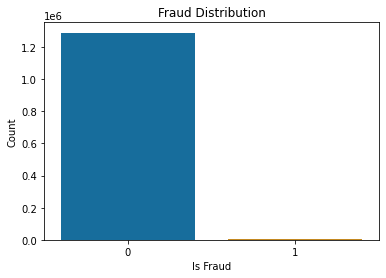

In [9]:
# fraud counts for entire training set
# it is imbalanced

fraud_dict = {1: 'Fraud', 0:'Not Fraud'}
palette = sns.color_palette('colorblind')

chart = sns.countplot(x='is_fraud',data=train_df, palette=palette)
chart.set(xlabel='Is Fraud', ylabel='Count',title='Fraud Distribution')
plt.show()

In [10]:
# let's see the specific percentages

print('Training Set Fraud Imbalance')
print('-'*50)
print('Not Fraud: '+str(train_df['is_fraud'].value_counts()[0]/len(train_df)))
print('Fraud: '+str(train_df['is_fraud'].value_counts()[1]/len(train_df)))
print('\n')
print('Test Set Fraud Imbalance')
print('-'*50)
print('Not Fraud: '+str(test_df['is_fraud'].value_counts()[0]/len(test_df)))
print('Fraud: '+str(test_df['is_fraud'].value_counts()[1]/len(test_df)))

Training Set Fraud Imbalance
--------------------------------------------------
Not Fraud: 0.9942113482561166
Fraud: 0.005788651743883394


Test Set Fraud Imbalance
--------------------------------------------------
Not Fraud: 0.9961401355721147
Fraud: 0.0038598644278853163


Text(0.5, 1.05, 'Amount Histogram')

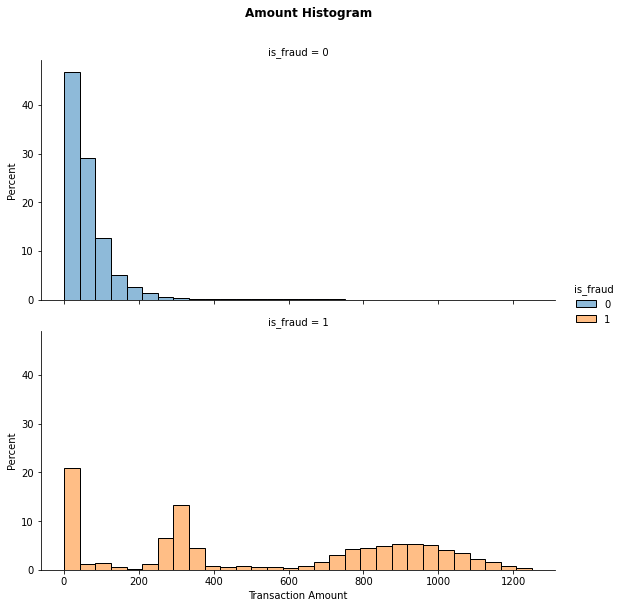

In [11]:
# I suspect that amount spent will be an indicator of fradualent activity 
# visualize amount spent vs fraud activity

chart = sns.displot(x='amt',data=train_df[train_df.amt<=1250],hue='is_fraud',row='is_fraud',bins=30,\
            stat='percent',common_norm=False,height=4,aspect=2)
chart.set(xlabel='Transaction Amount', ylabel='Percent')
chart.fig.suptitle('Amount Histogram',y=1.05,fontweight='bold')

Text(0.5, 1.05, 'Amount by Gender Histogram')

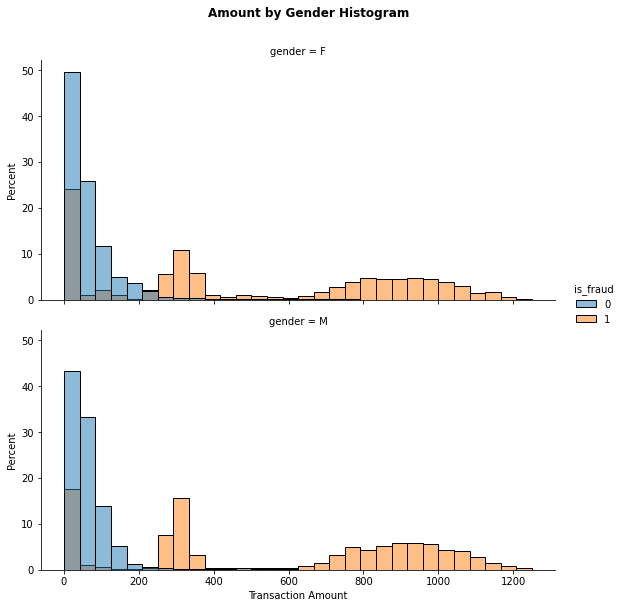

In [91]:
# visualize amount spent by gender vs fraud activity
chart = sns.displot(x='amt',data=train_df[train_df.amt<=1250],hue='is_fraud',row='gender',bins=30,\
            stat='percent',common_norm=False,height=4,aspect=2)
chart.set(xlabel='Transaction Amount', ylabel='Percent')
chart.fig.suptitle('Amount by Gender Histogram',y=1.05,fontweight='bold')

Text(0.5, 1.05, 'Amount Histogram')

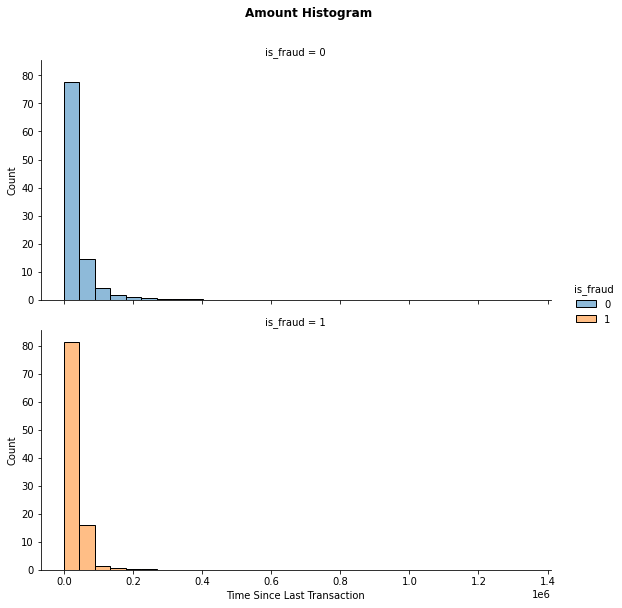

In [29]:
# View a distribution of the last time 
temp = train_df.copy()
temp['Time Since Last Transaction'] = train_df.groupby('cc_num')['unix_time'].diff()

temp['Time Since Last Transaction'].dropna(inplace=True)

chart = sns.displot(x='Time Since Last Transaction',data=temp,hue='is_fraud',row='is_fraud',stat='percent',bins=30,\
                    common_norm=False,height=4,aspect=2)
chart.set(xlabel='Time Since Last Transaction', ylabel='Count')
chart.fig.suptitle('Time Since Last Purchace Histogram',y=1.05,fontweight='bold')

In [23]:
temp

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Time Since Last Transaction
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,NaN
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,NaN
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,16781.0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,7962.0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,29074.0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,91018.0
